In [1]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [2]:
trial = "valueSize_linear_200_2000_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
df

,level_0,index,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,...,waitTime,warmupTime,debug,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,rx_goodput,tx_goodput,tenancy
0,0,0,1,1,c5.xlarge,c5.xlarge,30,200,4,1,...,2,2,False,79.5,28.4,60.2,95.0,3.0,0.4,dedicated
1,1,1,1,1,c5.xlarge,c5.xlarge,30,200,4,1,...,2,2,False,81.6,33.1,60.2,96.4,2.9,0.4,dedicated
2,2,2,1,1,c5.xlarge,c5.xlarge,30,200,4,1,...,2,2,False,79.6,39.0,60.2,94.7,3.0,0.4,dedicated
3,3,3,1,1,c5.xlarge,c5.xlarge,30,200,4,1,...,2,2,False,80.2,36.2,54.8,95.7,2.9,0.4,dedicated
4,4,4,1,1,c5.xlarge,c5.xlarge,30,200,4,1,...,2,2,False,79.3,27.8,54.8,95.5,3.0,0.4,dedicated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,1,1,c5.xlarge,c5.xlarge,30,2000,4,1,...,2,2,False,78.5,34.6,54.8,95.4,3.0,0.4,dedicated
196,196,196,1,1,c5.xlarge,c5.xlarge,30,2000,4,1,...,2,2,False,79.4,25.3,54.8,95.7,3.0,0.4,dedicated
197,197,197,1,1,c5.xlarge,c5.xlarge,30,2000,4,1,...,2,2,False,82.7,32.4,60.2,97.0,2.8,0.4,dedicated
198,198,198,1,1,c5.xlarge,c5.xlarge,30,2000,4,1,...,2,2,False,81.6,35.7,60.2,96.7,2.9,0.4,dedicated


adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| memcached | 1.5 | 1.5 | 1.6 | 1.6 |  1.6  | 1.5 | 1.5  |  1.3   |  1.4  |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+
| App/RMSRE(%) | 200.0 | 400.0 | 600.0 | 800.0 | 1000.0 | 1200.0 | 1400.0 | 1600.0 | 1800.0 | 2000.0 |
+--------------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+
|  memcached   |  1.4  |  1.1  |  0.9  |  1.0  |  1.8   |  1.6   |  1.0   |  1.2   |  1.4   |  1.5   |
+--------------+-------+-------+-------+--

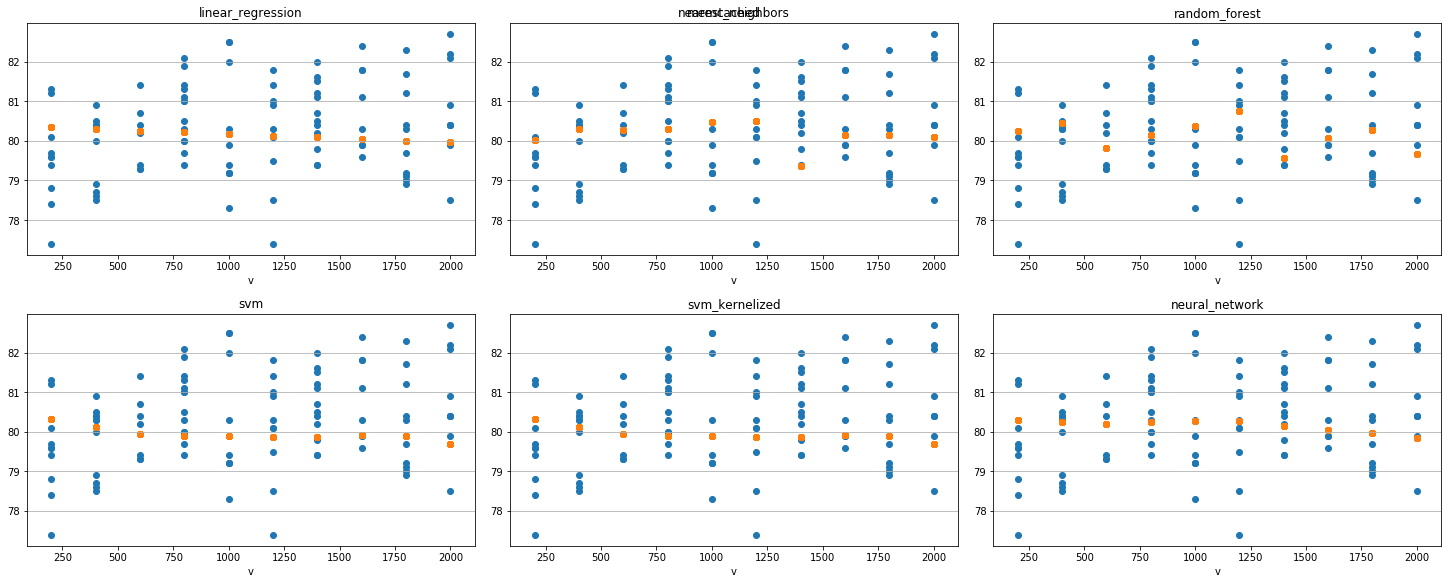

In [3]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["valueSize"]
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

In [8]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["valueSize"]
ctx["target_feature"] = "rx_goodput"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| memcached | 2.1 | 2.1 | 2.2 | 2.0 |  2.0  | 2.2 | 2.0  |  1.6   |  1.7  |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+
| App/RMSRE(%) | 200.0 | 400.0 | 600.0 | 800.0 | 1000.0 | 1200.0 | 1400.0 | 1600.0 | 1800.0 | 2000.0 |
+--------------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+
|  memcached   |  1.6  |  1.6  |  1.7  |  1.2  |  2.3   |  1.5   |  1.2   |  1.1   |  1.7   |  1.6   |
+--------------+-------+-------+-------+--

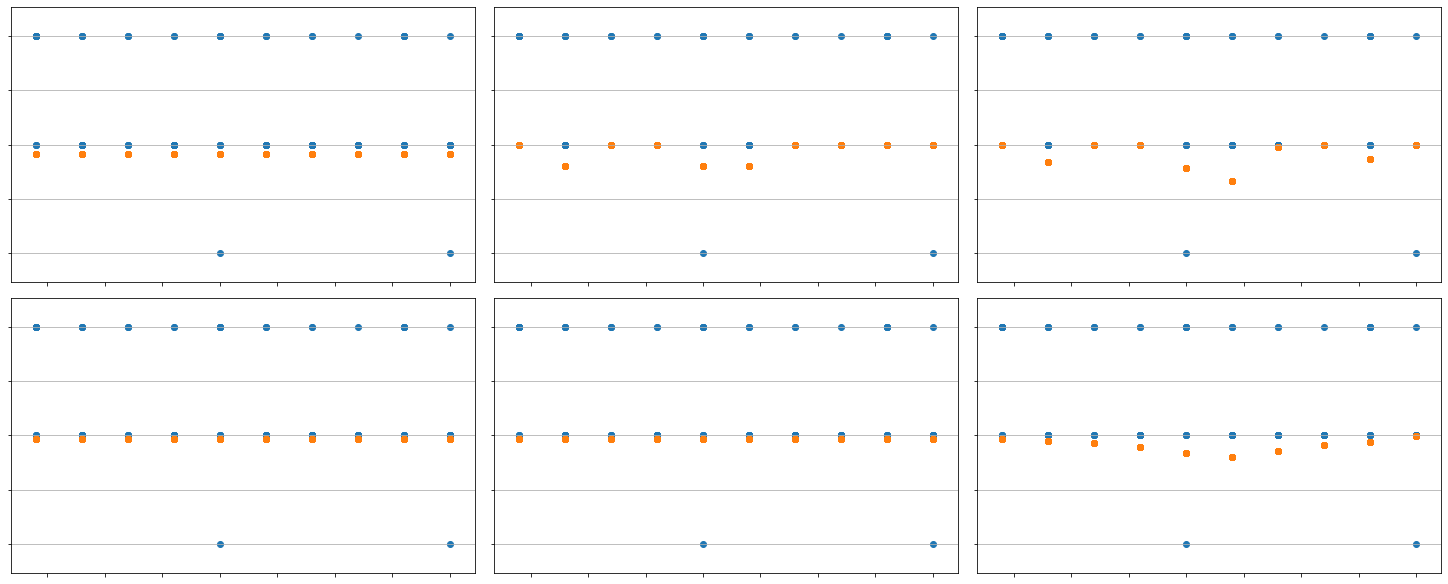

In [9]:
results = dataset_tool.best_case_eval(ctx, {"memcached": df})